2021-10-05 <br/>
Registered Nurses <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-10-05/readme.md

Choropleth Map - Done <br/>
Text annotation - Done

In [4]:
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
import plotly.express as px
pio.renderers.default='notebook'
import os

In [5]:
df=pd.read_csv ('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-10-05/nurses.csv')

In [6]:
df.head()

,State,Year,Total Employed RN,Employed Standard Error (%),Hourly Wage Avg,Hourly Wage Median,Annual Salary Avg,Annual Salary Median,Wage/Salary standard error (%),Hourly 10th Percentile,...,Hourly 90th Percentile,Annual 10th Percentile,Annual 25th Percentile,Annual 75th Percentile,Annual 90th Percentile,Location Quotient,Total Employed (National)_Aggregate,"Total Employed (Healthcare, National)_Aggregate","Total Employed (Healthcare, State)_Aggregate",Yearly Total Employed (State)_Aggregate
0,Alabama,2020,48850.0,2.9,28.96,28.19,60230.0,58630.0,0.8,20.75,...,38.67,43150.0,49360.0,68960.0,80420.0,1.20,140019790.0,8632190.0,128600.0,1903210
1,Alaska,2020,6240.0,13.0,45.81,45.23,95270.0,94070.0,1.4,31.50,...,60.70,65530.0,76830.0,110890.0,126260.0,0.98,140019790.0,8632190.0,17730.0,296300
2,Arizona,2020,55520.0,3.7,38.64,37.98,80380.0,79010.0,0.9,27.66,...,50.14,57530.0,67760.0,92920.0,104290.0,0.91,140019790.0,8632190.0,171010.0,2835110
3,Arkansas,2020,25300.0,4.2,30.60,29.97,63640.0,62330.0,1.4,21.47,...,39.65,44660.0,53490.0,73630.0,82480.0,1.00,140019790.0,8632190.0,80410.0,1177860
4,California,2020,307060.0,2.0,57.96,56.93,120560.0,118410.0,1.0,36.62,...,83.35,76180.0,93970.0,147830.0,173370.0,0.87,140019790.0,8632190.0,844740.0,16430660


In [7]:
df.columns

Index(['State', 'Year', 'Total Employed RN', 'Employed Standard Error (%)',
       'Hourly Wage Avg', 'Hourly Wage Median', 'Annual Salary Avg',
       'Annual Salary Median', 'Wage/Salary standard error (%)',
       'Hourly 10th Percentile', 'Hourly 25th Percentile',
       'Hourly 75th Percentile', 'Hourly 90th Percentile',
       'Annual 10th Percentile', 'Annual 25th Percentile',
       'Annual 75th Percentile', 'Annual 90th Percentile', 'Location Quotient',
       'Total Employed (National)_Aggregate',
       'Total Employed (Healthcare, National)_Aggregate',
       'Total Employed (Healthcare, State)_Aggregate',
       'Yearly Total Employed (State)_Aggregate'],
      dtype='object')

In [8]:
df_red=df[['State', 'Year','Total Employed RN','Annual Salary Avg','Annual Salary Median']]

In [9]:
code = {'Alabama': 'AL',
        'Alaska': 'AK',
        'Arizona': 'AZ',
        'Arkansas': 'AR',
        'California': 'CA',
        'Colorado': 'CO',
        'Connecticut': 'CT',
        'Delaware': 'DE',
        'District of Columbia': 'DC',
        'Florida': 'FL',
        'Georgia': 'GA',
        'Hawaii': 'HI',
        'Idaho': 'ID',
        'Illinois': 'IL',
        'Indiana': 'IN',
        'Iowa': 'IA',
        'Kansas': 'KS',
        'Kentucky': 'KY',
        'Louisiana': 'LA',
        'Maine': 'ME',
        'Maryland': 'MD',
        'Massachusetts': 'MA',
        'Michigan': 'MI',
        'Minnesota': 'MN',
        'Mississippi': 'MS',
        'Missouri': 'MO',
        'Montana': 'MT',
        'Nebraska': 'NE',
        'Nevada': 'NV',
        'New Hampshire': 'NH',
        'New Jersey': 'NJ',
        'New Mexico': 'NM',
        'New York': 'NY',
        'North Carolina': 'NC',
        'North Dakota': 'ND',
        'Ohio': 'OH',
        'Oklahoma': 'OK',
        'Oregon': 'OR',
        'Pennsylvania': 'PA',
        'Rhode Island': 'RI',
        'South Carolina': 'SC',
        'South Dakota': 'SD',
        'Tennessee': 'TN',
        'Texas': 'TX',
        'Utah': 'UT',
        'Vermont': 'VT',
        'Virginia': 'VA',
        'Washington': 'WA',
        'West Virginia': 'WV',
        'Wisconsin': 'WI',
        'Wyoming': 'WY'}

In [10]:
df_red['Code'] = df_red['State'].map(code)

d:\Users\DComputer\Desktop\learning\Streamlined EDA and ML\project_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [11]:
df_red.head()

,State,Year,Total Employed RN,Annual Salary Avg,Annual Salary Median,Code
0,Alabama,2020,48850.0,60230.0,58630.0,AL
1,Alaska,2020,6240.0,95270.0,94070.0,AK
2,Arizona,2020,55520.0,80380.0,79010.0,AZ
3,Arkansas,2020,25300.0,63640.0,62330.0,AR
4,California,2020,307060.0,120560.0,118410.0,CA


In [12]:
df_red.sort_values(by='Year', ascending=True,inplace=True)

d:\Users\DComputer\Desktop\learning\Streamlined EDA and ML\project_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
fig = px.choropleth(df_red,
                    locations='Code',
                    color='Total Employed RN',
                    color_continuous_scale='spectral_r',
                    animation_frame="Year",
                    hover_name='State',
                    locationmode='USA-states',
                    labels={'Total Employed RN':'Total Employed Nurses'},
                    scope='usa',
                    title='Total Registered Nurses over Time'
                    )
fig.show()

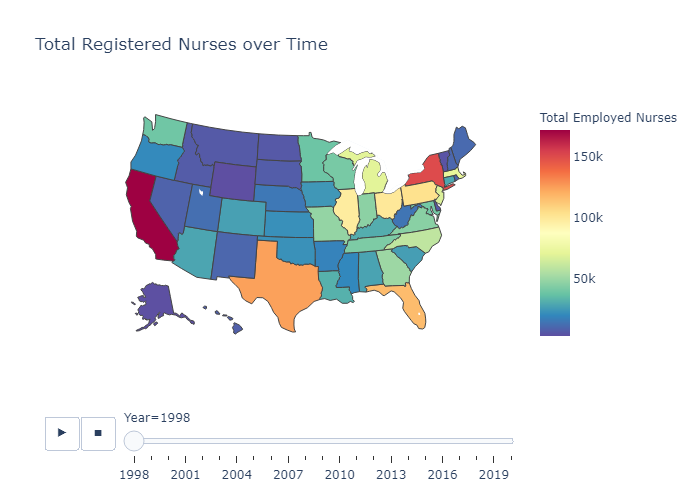

In [21]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [22]:
df_red.columns

Index(['State', 'Year', 'Total Employed RN', 'Annual Salary Avg',
       'Annual Salary Median', 'Code'],
      dtype='object')

In [23]:
fig = px.choropleth(df_red,
                    locations='Code',
                    color='Annual Salary Median',
                    color_continuous_scale='spectral_r',
                    animation_frame="Year",
                    hover_name='State',
                    locationmode='USA-states',
                    #labels={'Total Employed RN':'Total Employed Nurses'},
                    scope='usa',
                    title='Median Yearly Salary of the Nurses over Time'
                    )
fig.show()

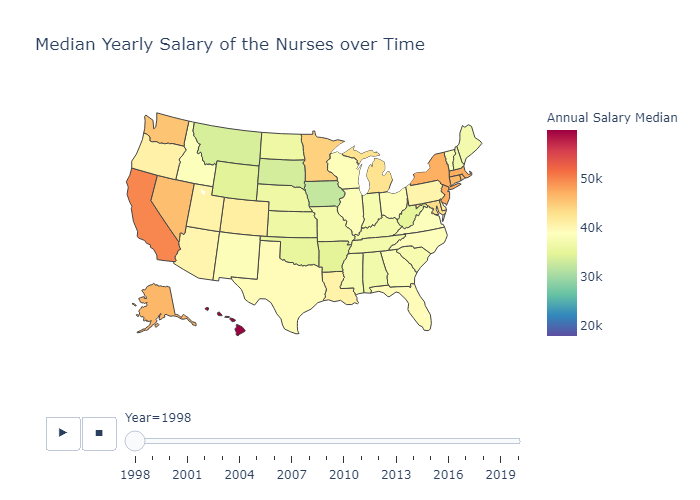

In [24]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)

In [25]:
df_red_2020= df_red.loc[df_red.Year==2020]

In [26]:
fig = px.scatter(df_red_2020, x="Annual Salary Median", y="Total Employed RN", trendline="ols",hover_name='State')


fig.add_annotation(
            x=118400,
            y=311000,
            showarrow=True,
            arrowhead=1,
            text="High Demand and Value",
            textangle=0)

fig.add_annotation(
            x=33000,
            y=22000,
            showarrow=True,
            arrowhead=1,
            text="Low Demand and Value",
            textangle=0)



fig.show()

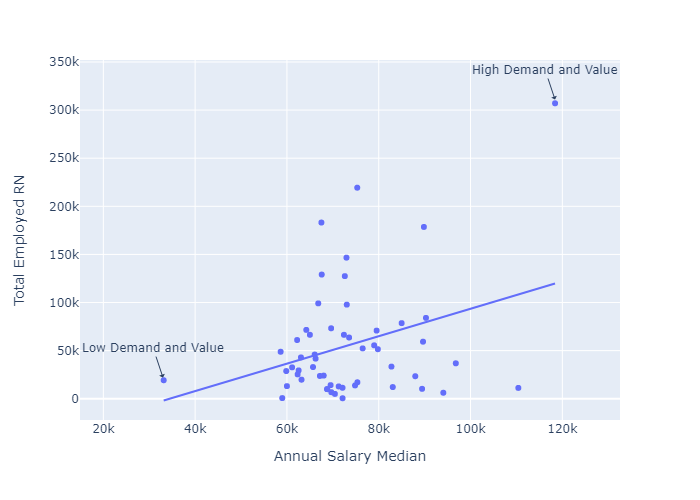

In [27]:
# Display Output in production
img_bytes = fig.to_image(format="png")
from IPython.display import Image
Image(img_bytes)